# Projeto 1
## Matheus Botelho Sampaio Netto - 299  - GES

Projeto apresentado à disciplina **Computação Gráfica e Multimídia - C209 L1**

**Notas:**
* Muitos recursos de Image e NumPy foram utilizadas nesse projeto
    1. numpy.hstack(tup, *, dtype=None, casting='same_kind')<br>
    Empilha arrays horizontalmente (colunas); equivalente a concatenação no axis=0

    2. numpy.vstack(tup, *, dtype=None, casting='same_kind')<br>
    Empilha arrays horizontalmente (linhas); equivalente a concatenação no axis=1

    3. numpy.ndarray.resize(new_shape, refcheck=True)<br>
    Muda o formato e tamanho da array

    4. PIL.Image.fromarray(obj: SupportsArrayInterface, mode: str | None = None) → Image<br>
    Método que cria uma imagem com base numa array gerada pelo NumPy

    5. Image.convert(mode: str | None = None, matrix: tuple[float, ...] | None = None, dither: Dither | None = None, palette: Palette = Palette.WEB, colors: int = 256) → Image <br>
    Método que converte diretamente a imagem gerada (ex: RGB -> HSV)

* Links:
1. [numpy.hstack](https://numpy.org/doc/2.1/reference/generated/numpy.hstack.html)
2. [numpy.vstack](https://numpy.org/doc/2.1/reference/generated/numpy.vstack.html)
3. [numpy.ndarray.resize](https://numpy.org/doc/2.1/reference/generated/numpy.ndarray.resize.html#numpy.ndarray.resize)
4. [PIL.Image.fromarray](https://pillow.readthedocs.io/en/stable/reference/Image.html)
5. [Image.convert](https://pillow.readthedocs.io/en/stable/reference/Image.html)
6. [Documentação oficial NumPy](https://numpy.org/doc/2.1/index.html)
7. [Documentação oficial PIL](https://pillow.readthedocs.io/en/stable/index.html)

### 0 - Importações das bibliotecas utilizadas no código:

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

### 1 - Juntar Imagens

* Carregar imagens

In [3]:
img1 = Image.open("P1.png").convert("RGB")
img2 = Image.open("P2.png").convert("RGB")
img3 = Image.open("P3.jpg").convert("RGB")
img4 = Image.open("P4.png").convert("RGB")

* Redimensionar todas as imagens para o mesmo tamanho (referência na img1)

In [4]:
largura, altura = img1.size
img2 = img2.resize((largura, altura))
img3 = img3.resize((largura, altura))
img4 = img4.resize((largura, altura))

* Converter para arrays

In [5]:
img1_np = np.array(img1)
img2_np = np.array(img2)
img3_np = np.array(img3)
img4_np = np.array(img4)

* Concatenar horizontalmnete img1 e img2 - img3 e img4 (linha superior e inferior)

In [6]:
linha1 = np.hstack((img1_np, img2_np))
linha2 = np.hstack((img3_np, img4_np))

* Concatenar verticalmente juntado as linhas numa grade 2x2

In [7]:
imagem_concatenada = np.vstack((linha1, linha2))

* Exibir as imagens como comparação

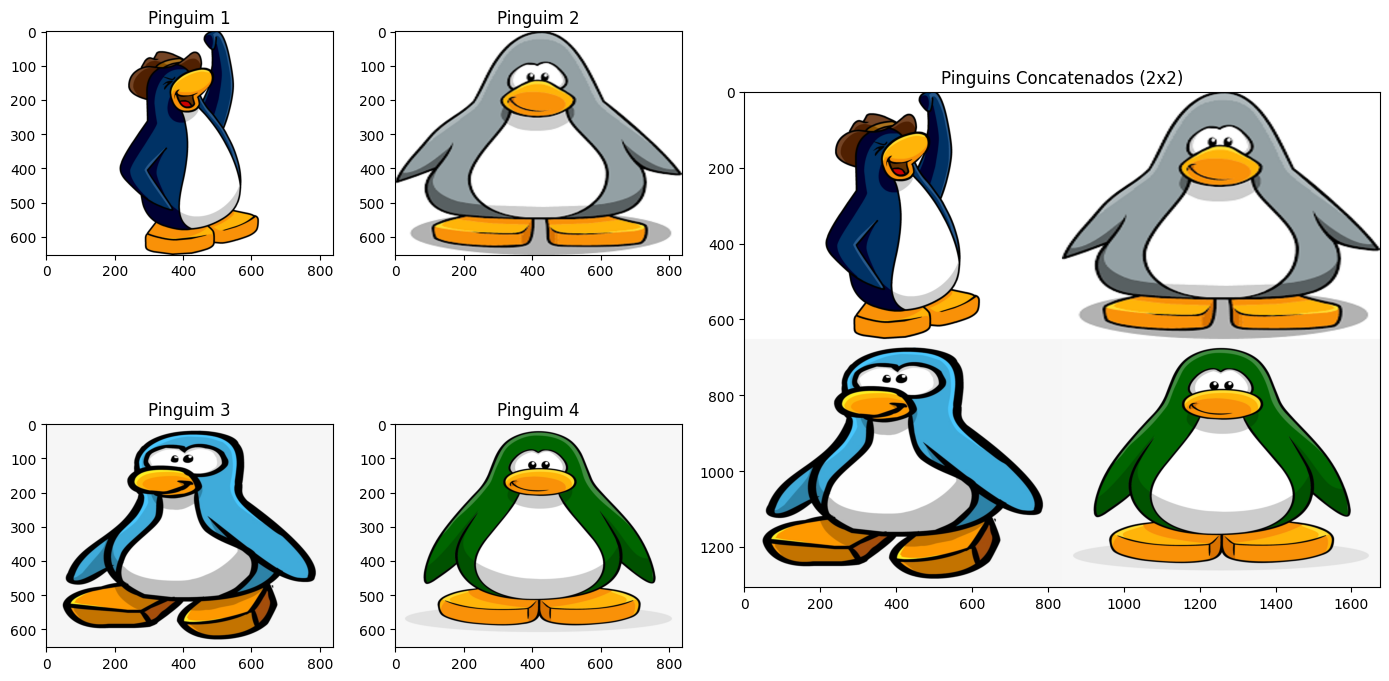

In [8]:
# Esse trecho de código serve somente para melhorar a saída
# Cria um sub plot dentro do plot original

fig = plt.figure(figsize=(14, 8))  # Ajuste do tamanho da figura

# Criando a grade 2x4 para os pinguins à esquerda
ax1 = plt.subplot2grid((2, 4), (0, 0))  # Linha 0, Coluna 0
ax2 = plt.subplot2grid((2, 4), (0, 1))  # Linha 0, Coluna 1
ax3 = plt.subplot2grid((2, 4), (1, 0))  # Linha 1, Coluna 0
ax4 = plt.subplot2grid((2, 4), (1, 1))  # Linha 1, Coluna 1

# Criando a área para a imagem combinada ocupando 2 colunas e 2 linhas
ax_comb = plt.subplot2grid((2, 4), (0, 2), rowspan=2, colspan=2)  # Ocupa Linhas 0-1, Colunas 2-3

ax1.imshow(img1)
ax1.set_title("Pinguim 1")

ax2.imshow(img2)
ax2.set_title("Pinguim 2")

ax3.imshow(img3)
ax3.set_title("Pinguim 3")

ax4.imshow(img4)
ax4.set_title("Pinguim 4")

ax_comb.imshow(imagem_concatenada)
ax_comb.set_title("Pinguins Concatenados (2x2)")

# Para retirar o eixo basta retirar o comentário
# ax1.axis("off")
# ax2.axis("off")
# ax3.axis("off")
# ax4.axis("off")
# ax_comb.axis("off")

plt.tight_layout()  # Ajusta automaticamente os espaçamentos
plt.show()

### 2 - Trocar Cores

* Converter para HSV

In [9]:
imagem_pil = Image.fromarray(imagem_concatenada)
imagem_hsv = imagem_pil.convert("HSV")

* Converter para array para manipulação

In [10]:
imagem_hsv_np = np.array(imagem_hsv)

* Ajustando o valor para mudar a cor apenas dos pinguins

In [11]:
imagem_hsv_np[:, :, 0] = (imagem_hsv_np[:, :, 0] + 60) % 255

* Converter de volta para RGB

In [12]:
imagem_alterada = Image.fromarray(imagem_hsv_np, "HSV").convert("RGB")

* Exibir imagem com cores alteradas

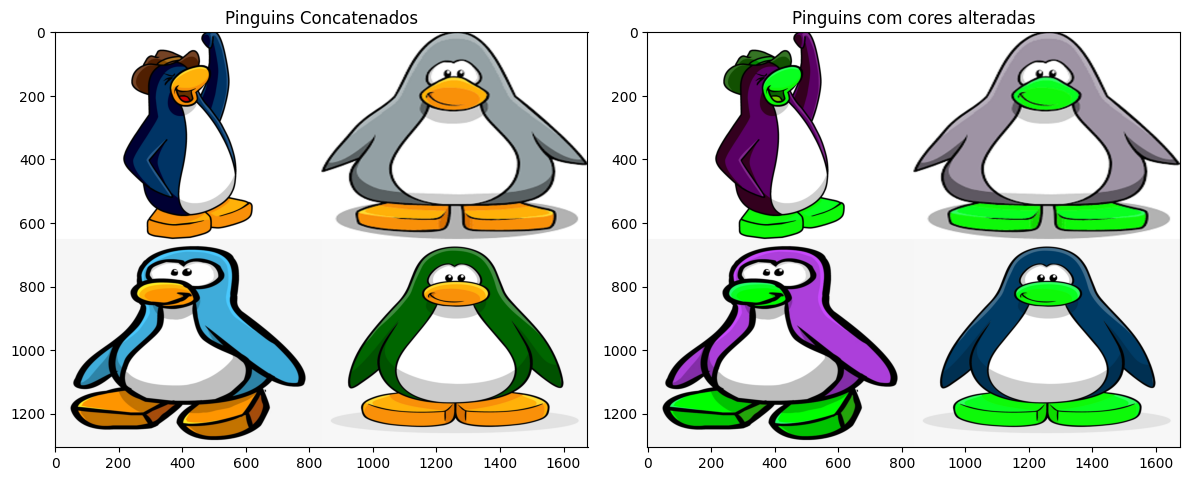

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem_hsv)
#plt.axis("off")
plt.title("Pinguins Concatenados")

plt.subplot(1, 2, 2)
plt.imshow(imagem_alterada)
#plt.axis("off")
plt.title("Pinguins com cores alteradas")

plt.tight_layout()  # Ajusta automaticamente os espaçamentos
plt.show()

### 3 - Espelhar

* Converte a imagem_alterada para array para espelhar

In [14]:
imagem_alterada_np = np.array(imagem_alterada)

* Reflexão horizontal (eixo y)

In [15]:
imagem_alterada_np_refl = np.zeros(shape=imagem_alterada_np.shape, dtype=np.uint8)
imagem_alterada_np_refl[::1, ::-1] = imagem_alterada_np

* Exibir imagem original (alteração de cor) e com reflexão

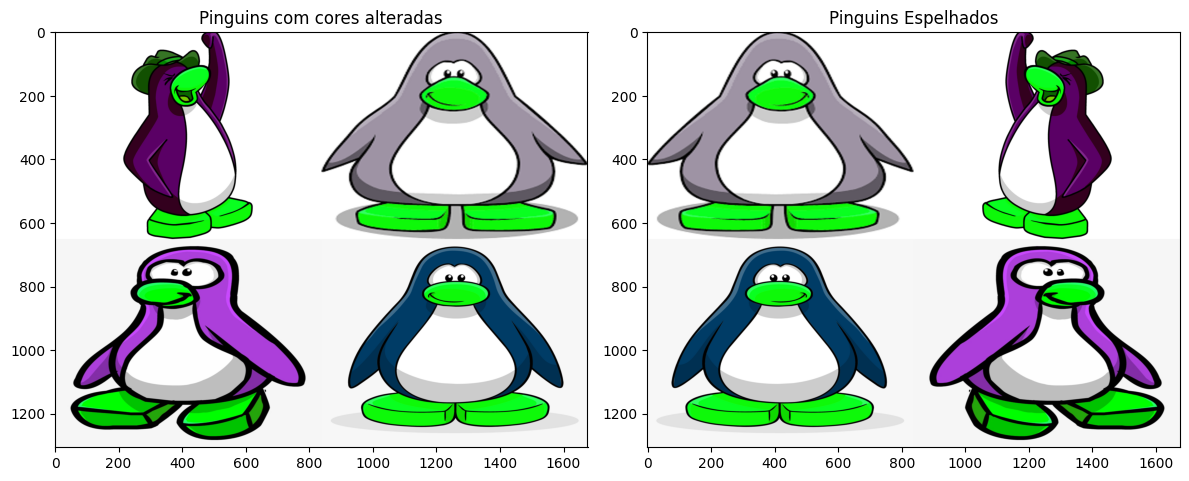

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem_alterada)
#plt.axis("off")
plt.title("Pinguins com cores alteradas")

plt.subplot(1, 2, 2)
plt.imshow(imagem_alterada_np_refl)
#plt.axis("off")
plt.title("Pinguins Espelhados")

plt.tight_layout()  # Ajusta automaticamente os espaçamentos
plt.show()

### 4 - Recortar pinguim favorito

* Definição das dimensões do pinguim

In [17]:
l, c, _ = imagem_alterada_np_refl.shape
x_start, x_end = c // 2, c  # Metade direita
y_start, y_end = l // 2, l  # Metade inferior

* Definição das dimensões da máscara

In [18]:
mask = np.zeros(shape=imagem_alterada_np_refl.shape, dtype=np.uint8)
mask[y_start : y_end, x_start : x_end, :] = 255

* Aplicação da máscara

In [19]:
imagem_alterada_np_refl_masked = imagem_alterada_np_refl & mask

* Exibir a comparação das imagens

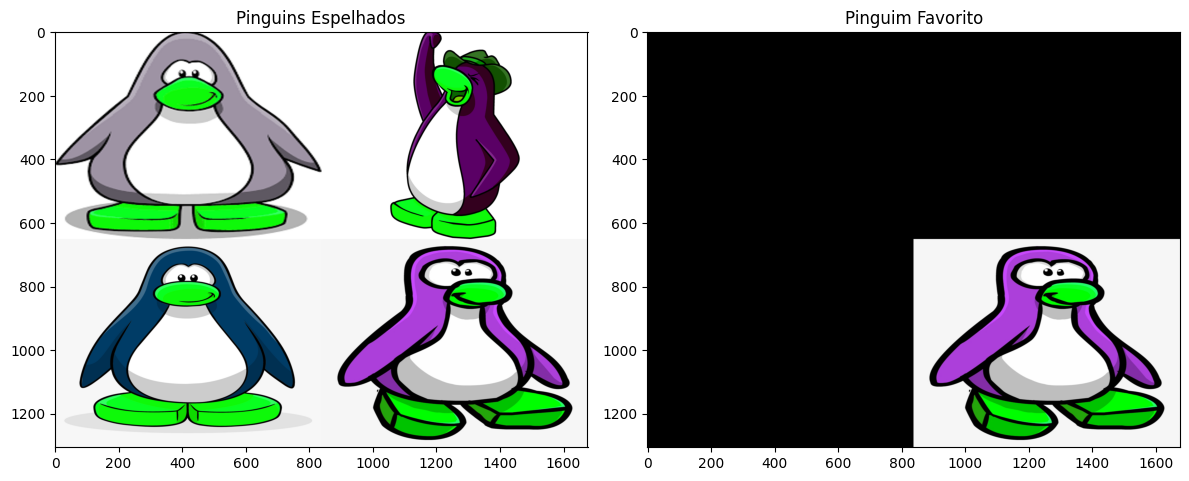

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem_alterada_np_refl)
#plt.axis("off")
plt.title("Pinguins Espelhados")

plt.subplot(1, 2, 2)
plt.imshow(imagem_alterada_np_refl_masked)
#plt.axis("off")
plt.title("Pinguim Favorito")

plt.tight_layout()  # Ajusta automaticamente os espaçamentos
plt.show()

### 5 - Análise Histográfica e verificação do valor para o Threshold

* Função histogram_gray

In [21]:
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)
    
    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

* Função show_histogram_gray

In [22]:
# Função para exibir o histograma de uma imagem em escala de cinza
def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 8))
    
    # Exibir a imagem
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')  # Desativar os eixos
    plt.title("Imagem em Escala de Cinza")
    
    # Exibir o histograma
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram, color='black')
    plt.title("Histograma da Imagem em Escala de Cinza")
    plt.xlabel("Intensidade de Cinza")
    plt.ylabel("Número de Pixels")
    
    plt.tight_layout()  # Ajustar o layout para não sobrepor os gráficos
    plt.show()

* Função show_histogram

In [23]:
# Função para calcular e exibir o histograma de uma imagem colorida
def show_histogram(img):
    # Calcular os histogramas para os 3 canais (R, G, B)
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 8))
    
    # Exibir a imagem colorida
    plt.subplot(2, 1, 1)
    plt.imshow(img)
    plt.axis('off')  # Desativar os eixos
    plt.title("Imagem Colorida")
    
    # Exibir o histograma dos 3 canais
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red', alpha=0.6, label='Red')
    plt.bar(range(256), histogram_g, color='green', alpha=0.6, label='Green')
    plt.bar(range(256), histogram_b, color='blue', alpha=0.6, label='Blue')
    plt.title("Histogramas dos Canais RGB")
    plt.xlabel("Intensidade de Cor")
    plt.ylabel("Número de Pixels")
    plt.legend()
    
    plt.tight_layout()  # Ajustar o layout para não sobrepor os gráficos
    plt.show()

* Conversão para escala de cinza

In [28]:
img_masked_gray = ((0.2126 * imagem_alterada_np_refl_masked[:, :, 0]) + (0.7152 * imagem_alterada_np_refl_masked[:, :, 1]) + (0.0722 * imagem_alterada_np_refl_masked[:, :, 2])).astype(np.uint8)

* Exibir os histogramas

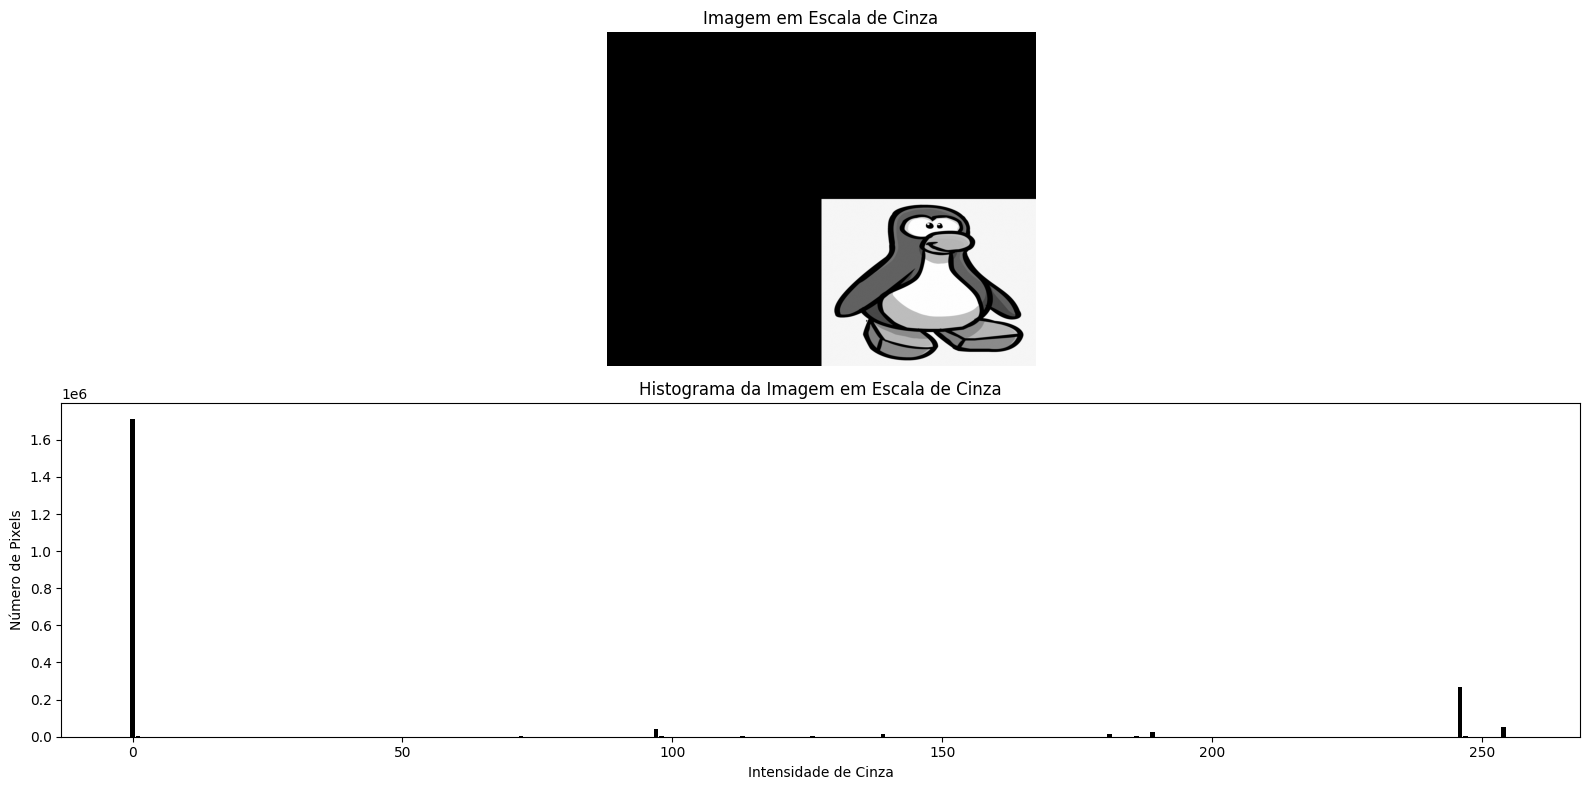

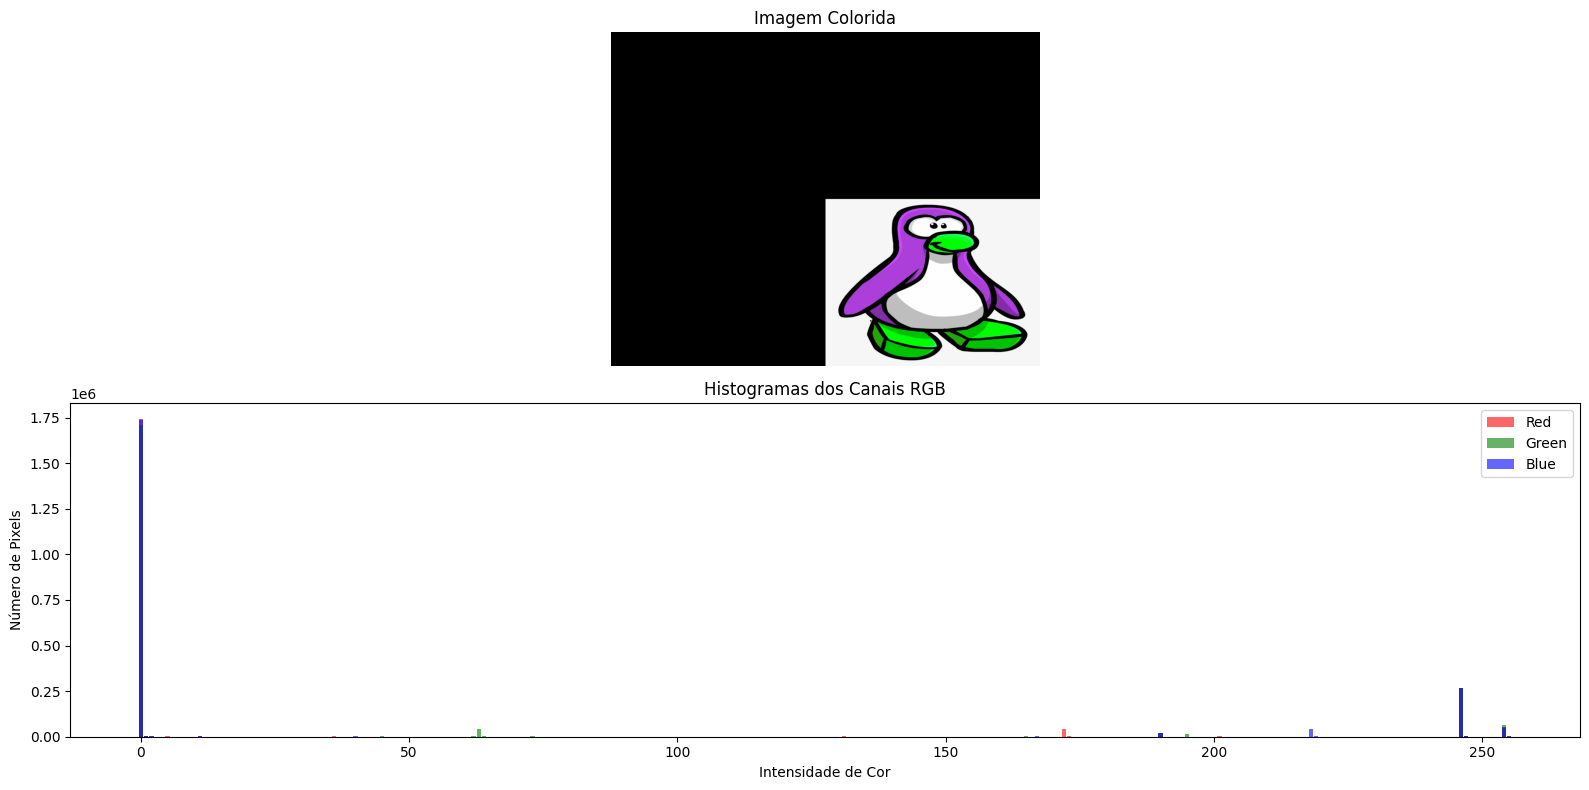

In [29]:
show_histogram_gray(img_masked_gray)  # Mostrar o histograma da imagem em escala de cinza
show_histogram(imagem_alterada_np_refl_masked)  # Mostrar o histograma da imagem colorida

#### A partir da análise do Histograma, é possível observar que o Threshold deve ficar entre 240 e 250

### 6 - Aplicação da pintura com o Threshold 

* Criando a máscara

In [30]:
threshold = 245

mask = img_masked_gray < threshold  # True para pixels abaixo do threshold

img_final = imagem_alterada_np_refl_masked.copy()  # Copia da imagem original (mascarada)

* Aplicando o azul

In [31]:
img_final[mask] = [0, 0, 255]

* Exibindo as imagens

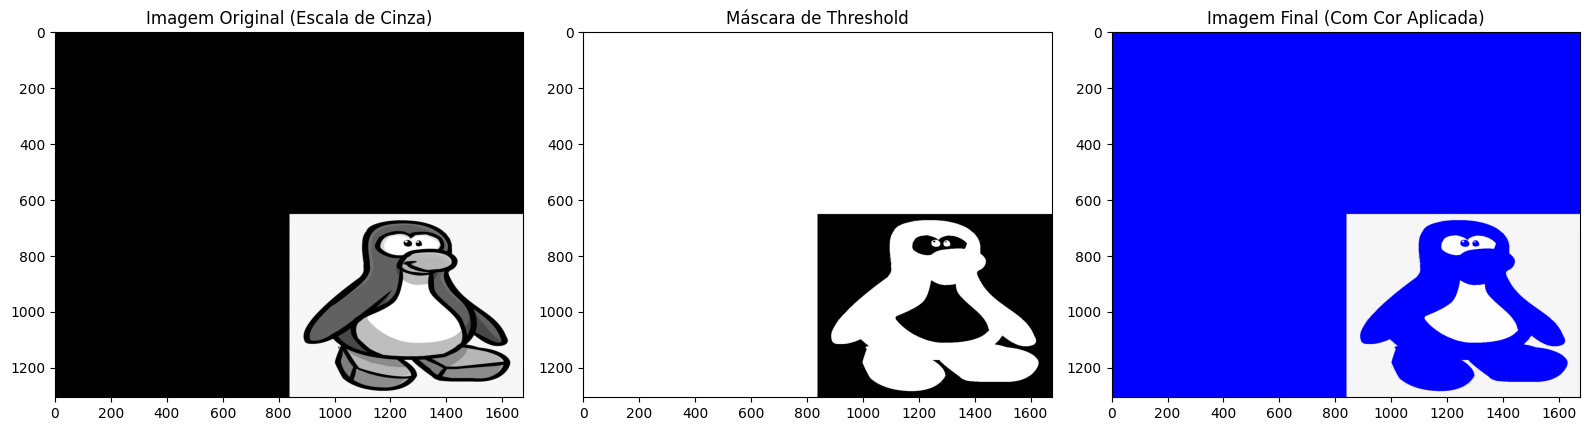

In [32]:
# Exibindo a imagem original, a máscara e a imagem final lado a lado
plt.figure(figsize=(16, 8))

# Exibindo a imagem original em escala de cinza
plt.subplot(1, 3, 1)
plt.imshow(img_masked_gray, cmap='gray')
plt.title("Imagem Original (Escala de Cinza)")

# Exibindo a máscara (pixels abaixo do threshold)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Máscara de Threshold")

# Exibindo a imagem final com a conversão de cor aplicada
plt.subplot(1, 3, 3)
plt.imshow(img_final)
plt.title("Imagem Final (Com Cor Aplicada)")

plt.tight_layout()
plt.show()